In [1]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import multiprocessing

def mandelbrot_set(reC, imC, threshold):
    c = complex(reC, imC)
    z = complex(0, 0)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 2.:
            return i
    return threshold - 1

def Draw_mandelbrot_div(reC, imC, max_iter):
    X = np.empty((len(reC), len(imC)))
    for i in range(len(reC)):
        for j in range(len(imC)):
            X[i,j] = mandelbrot_set(reC[i], imC[j], max_iter)
    return X

def Draw_mandelbrot_parallel(x_start, y_start, width, height, pixel_density, max_iter, num_cores, num_divisions):
    division_size=(width)/num_divisions
    C = np.empty((num_divisions,num_divisions,int(division_size*pixel_density)),dtype=np.complex_)
    X = np.empty((num_divisions,num_divisions,int(division_size*pixel_density),int(division_size*pixel_density)))
    for i in range(num_divisions):
        for k in range(num_divisions):
            reC = np.linspace(x_start + (i)*division_size, x_start + 
                                     (i+1)*division_size,int(division_size*pixel_density))
            imC = np.linspace(y_start + (k)*division_size, y_start + 
                                     (k+1)*division_size,int(division_size*pixel_density))
            C[i,k,:] = reC + imC*1j
            
    for i in range(num_divisions):
        X[i,:] = Parallel(n_jobs=num_cores)(delayed(Draw_mandelbrot_div)(np.real(j), np.imag(j), max_iter) for j in C[i,:])
    return X

In [2]:
x_start, y_start = -2, -1.5
width, height = 3, 3
pixel_density = 2400 # number of pixels in 1 unit of x and y
max_iter = 500
num_cores = 24
num_divisions = 24
division_size=int((width)/num_divisions*pixel_density)
M = Draw_mandelbrot_parallel(x_start, y_start, width, height, pixel_density, max_iter, num_cores, num_divisions)
Mandelbrot_set = np.empty((width*pixel_density,width*pixel_density))
for i,divisionx in enumerate(M):
    for j,divisiony in enumerate(divisionx):
        Mandelbrot_set[i*division_size:(i+1)*division_size,j*division_size:(j+1)*division_size] = divisiony

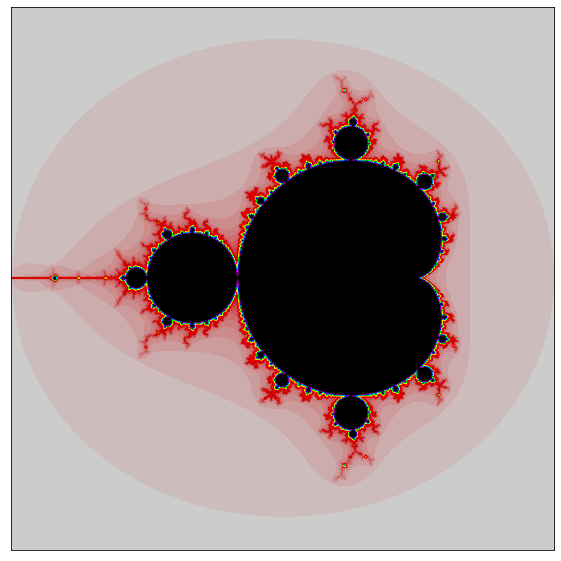

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

ax.clear()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])


img = ax.imshow(Mandelbrot_set.T, interpolation="bicubic", cmap='nipy_spectral_r')
plt.savefig('Mandelbrot.png',dpi=pixel_density*width/10)